In [2]:
from datetime import datetime
import datetime as dt
import pytz
import seaborn as sns
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
import pandas as pd
import pytz
import numpy as np
import os

# Display MetaTrader5 package information
print(f"MetaTrader5 package version: {mt5.__version__}")
print(f"MetaTrader5 author: {mt5.__author__}")

# Initialize connection to the MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =", mt5.last_error())
    quit()

# Set the time zone to UTC
timezone = pytz.timezone("Etc/UTC")

lst_ = ['EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'AUDUSD', 'USDCAD', 'NZDUSD','EURGBP', 'EURAUD', 'EURJPY', 'GBPJPY', 'AUDJPY', 'CADJPY', 'CHFJPY',
        'NZDJPY', 'GBPAUD', 'GBPCAD', 'AUDCHF', 'AUDCAD', 'AUDNZD', 'EURNZD','GBPNZD', 'CADCHF', 'NZDCAD', 'NZDCHF', 'EURCHF', 'EURCAD', 'AUDSGD', 'CADSGD', 'CHFJPY', 'NZDSGD']

dict_ = {}

for symbol in lst_:
    # Define the date and time range for historical data (weekly version)
    days_offset = dt.timedelta(weeks=8)
    local_time = dt.datetime.today()

    # Calculate the start and end dates for the weekly range in UTC
    utc_from = local_time - days_offset
    utc_to = local_time

    # Get historical price data for the symbol on a daily timeframe
    timeframe = mt5.TIMEFRAME_D1
    rates = mt5.copy_rates_range(symbol, timeframe, utc_from, utc_to)

    # Check if data retrieval was successful
    if rates is not None and len(rates) > 0:
        # Create a DataFrame from the obtained data
        df = pd.DataFrame(rates)

        # Convert time in seconds to 'datetime' format
        df['time'] = pd.to_datetime(df['time'], unit='s')

        # Store the DataFrame in the dictionary
        dict_[f'df_30_{symbol}'] = df
    else:
        print(f"Failed to retrieve data for {symbol}")

# Shut down the connection to the MetaTrader 5 terminal
mt5.shutdown()

# Display the first 10 elements of the obtained data for each currency pair
for key, df in dict_.items():
    print(f"\nData for {key}:")
    print(df.head(10))


MetaTrader5 package version: 5.0.45
MetaTrader5 author: MetaQuotes Ltd.

Data for df_30_EURUSD:
        time     open     high      low    close  tick_volume  spread  \
0 2023-10-09  1.05514  1.05745  1.05195  1.05665        85637       0   
1 2023-10-10  1.05602  1.06199  1.05544  1.06047       100414       0   
2 2023-10-11  1.06009  1.06348  1.05807  1.06187        91042       0   
3 2023-10-12  1.06139  1.06398  1.05257  1.05279        87761       0   
4 2023-10-13  1.05271  1.05586  1.04955  1.05068        97499       0   
5 2023-10-16  1.05049  1.05628  1.05028  1.05593        73706       0   
6 2023-10-17  1.05585  1.05950  1.05330  1.05759        81172       0   
7 2023-10-18  1.05703  1.05943  1.05232  1.05362        85473       0   
8 2023-10-19  1.05322  1.06168  1.05282  1.05816       102927       0   
9 2023-10-20  1.05766  1.06037  1.05650  1.05948        81219       0   

   real_volume  
0            0  
1            0  
2            0  
3            0  
4            0 

        time     open     high      low    close  tick_volume  spread  \
0 2023-10-09  108.973  109.366  108.943  109.283        80505       2   
1 2023-10-10  109.151  109.668  109.129  109.485       102065       2   
2 2023-10-11  109.419  109.765  109.272  109.728        80028       2   
3 2023-10-12  109.534  109.945  109.311  109.420        81035       2   
4 2023-10-13  109.372  109.747  109.289  109.505        82925       2   
5 2023-10-16  109.164  109.984  109.164  109.859        75450       2   
6 2023-10-17  109.843  109.922  109.119  109.758        80403       0   
7 2023-10-18  109.689  109.954  109.269  109.300        81509       2   
8 2023-10-19  109.298  109.446  109.020  109.175        95678       2   
9 2023-10-20  109.030  109.672  109.030  109.291        78343       2   

   real_volume  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  
6            0  
7            0  
8            0  
9            0  

Data for

        time     open     high      low    close  tick_volume  spread  \
0 2023-10-09  0.95905  0.96091  0.95588  0.95795        80650       2   
1 2023-10-10  0.95633  0.96143  0.95602  0.95939        79662       2   
2 2023-10-11  0.95934  0.96016  0.95633  0.95776        71979       2   
3 2023-10-12  0.95643  0.95774  0.95445  0.95632        68348       2   
4 2023-10-13  0.95627  0.95726  0.94568  0.94823        79359       2   
5 2023-10-16  0.94669  0.95229  0.94666  0.95048        59096       2   
6 2023-10-17  0.94977  0.95339  0.94961  0.95209        63701       2   
7 2023-10-18  0.95095  0.95242  0.94494  0.94724        80439       2   
8 2023-10-19  0.94588  0.94848  0.94276  0.94329        72168       2   
9 2023-10-20  0.94269  0.94562  0.94172  0.94542        68972       2   

   real_volume  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  
6            0  
7            0  
8            0  
9            0  

Data for

In [3]:
df_close = pd.concat([dict_[i]['close'] for i in dict_.keys() if 'JPY' not in i], axis='columns')

In [4]:
df_close.columns = [i for i in lst_ if 'JPY' not in i]

In [5]:
corr_close = df_close.corr()
corr_close.to_excel('C:\\Users\\morara\\correlation\\Corr_2Monthly.xlsx')

In [6]:
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]>0.75].dropna()

with open('C:/Users/morara/correlation/High_2Monthcorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n')

In [7]:
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]<0.3].dropna()

with open('C:/Users/morara/correlation/Negative_2Monthcorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n')

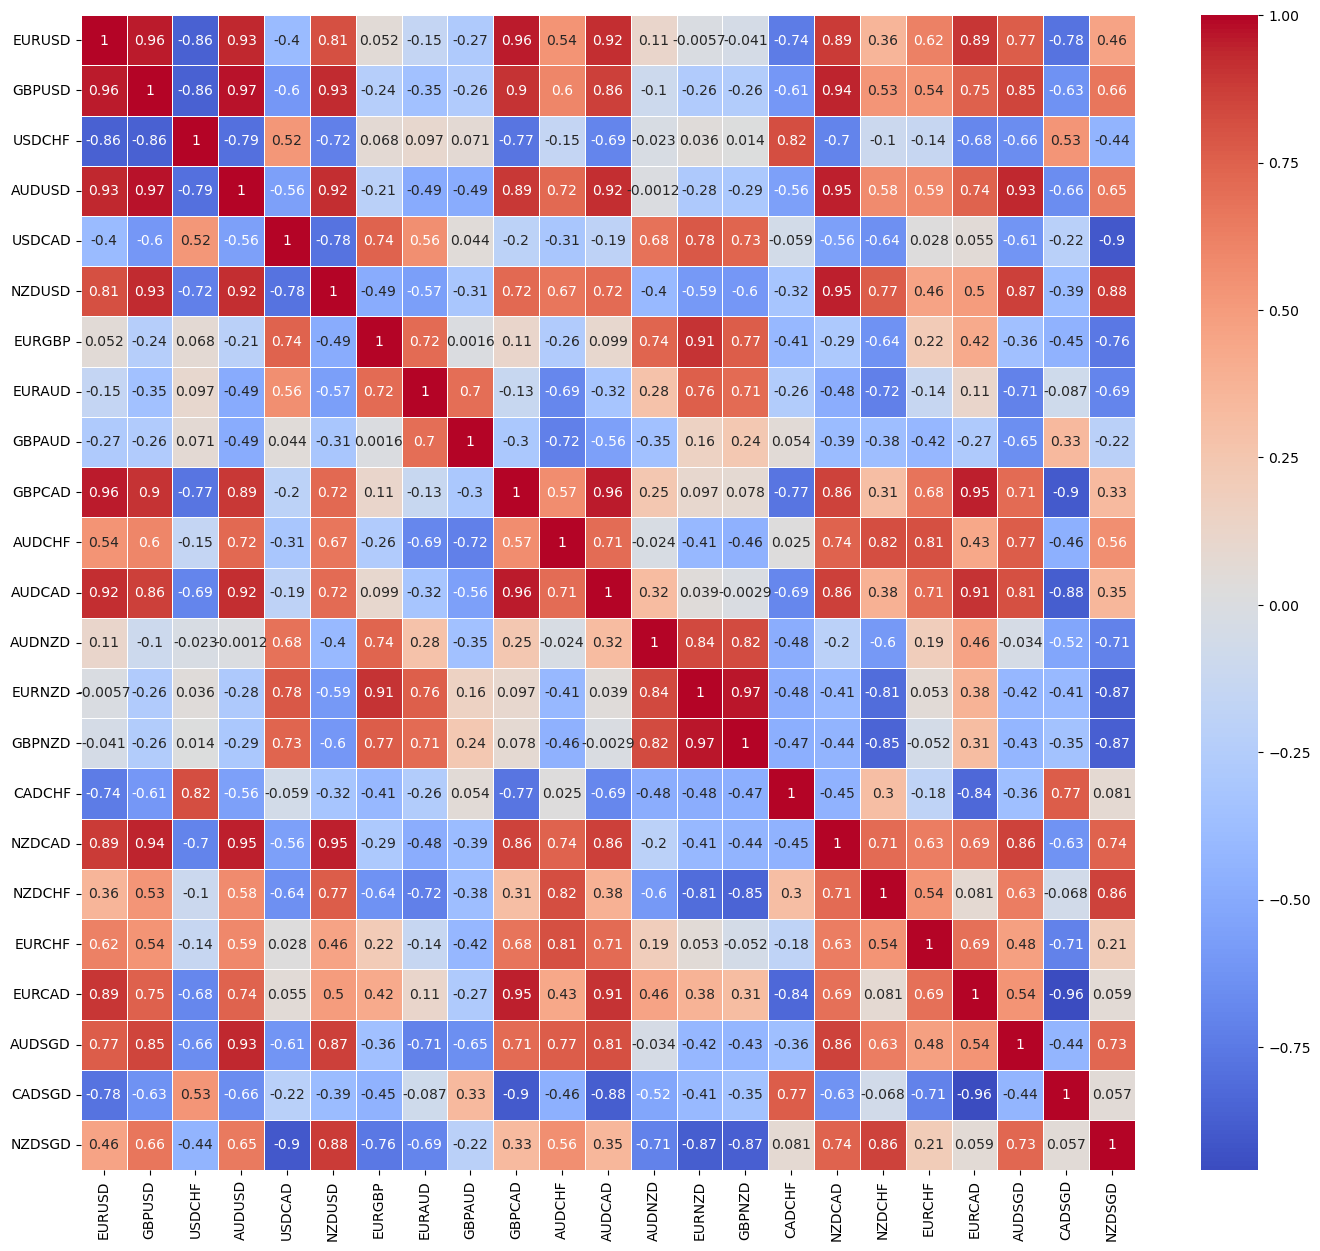

In [8]:
fig, ax = plt.subplots(figsize=(17,15))
hm = sns.heatmap(corr_close, annot=True,cmap='coolwarm', linewidths=0.5, ax=ax)
folder_path = 'C:\\Users\\morara\\correlation\\'
file_name = 'my_Corr-2Month.jpg'  # Change the file format to your preference (.png, .jpg, .pdf, etc.)
plt.savefig(os.path.join(folder_path, file_name))  # Use os.path.join to combine folder_path and file_name
plt.show();